# Step 1: Import Necessary Libraries

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_diabetes

# Step 2: Load the Diabetes Dataset

In [144]:
diabetes = load_diabetes()
df = pd.DataFrame(data= diabetes.data, columns= diabetes.feature_names)

df['target'] = diabetes.target

In [145]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


# Step 3: Prepare the Data

In [146]:
df.isnull().sum() # check for null values

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [147]:
X= df.iloc[:,:10]
y= (df.target >140).astype(int)  #target and changing it to binary 

In [148]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [149]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: target, dtype: int32

## Split the data into training and testing sets

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize Features
The code involves using the StandardScaler from scikit-learn to
standardize the features of the dataset. Standardization is a preprocessing
step that scales the features to have a mean of 0 and a standard deviation
of 1. This is important for algorithms like K-Nearest Neighbors (KNN) that
rely on distance measures because it ensures that all features contribute
equally to the distance computation.

▶ `fit`: Computes the mean and standard deviation (or any other statistics) of the X_train data.\
▶ `transform`: Uses the computed statistics (mean and standard deviation) to scale the data. \
`fit_transform(X_train)` → Computes mean and standard deviation on X_train and scales it.\
`transform(X_test)` → Uses the already computed mean and standard deviation (from X_train) to scale X_test. \
After the first fit_transform call, the scaler object "remembers" the mean and standard deviation. 
That's why we only use transform for X_test.

In [178]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Choose the Value of K
In order to decide the best value for hyperparameter k, you will do something called grid-search. You will train and test your model on 10 different k values and finally use the one that gives you the best results.

Let's initialize a variable neighbors(k) which will have values ranging from 1-9 and two numpy zero matrices namely train_accuracy and test_accuracy each for training and testing accuracy. You will need them later to plot a graph to choose the best neighbor value.

In [179]:
neighbors = np.arange(1,9)
train_accuracy =np.zeros(len(neighbors))
test_accuracy = np.zeros(len(neighbors))


Next piece of code is where all the magic will happen. You will enumerate over all the nine neighbor values and for each neighbor you will then predict both on training and testing data. Finally, store the accuracy in the train_accuracy and test_accuracy numpy arrays.

In [180]:
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(X_train_scaled, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_scaled, y_train)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test_scaled, y_test)


Next, you will plot the training and testing accuracy using matplotlib, with accuracy vs. varying number of neighbors graph you will be able to choose the best k value at which your model performs the best.

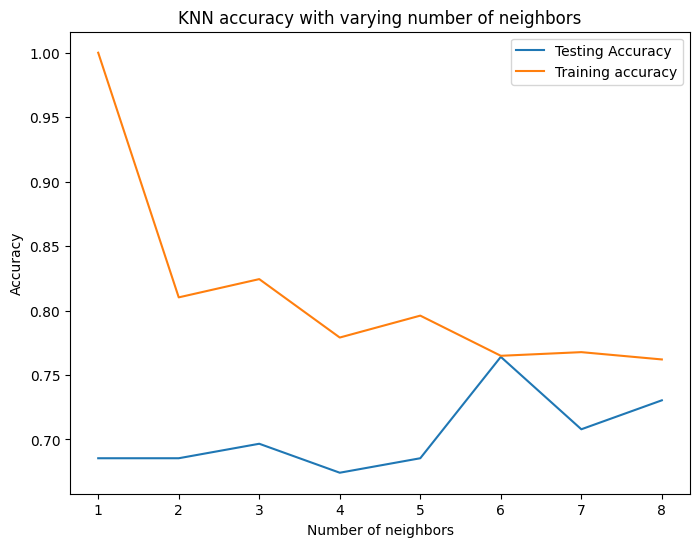

In [189]:
plt.figure(figsize=(8,6))
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.title('KNN accuracy with varying number of neighbors')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Well, by looking at the above graph, it looks like when n_neighbors=6, both the model performs the best.\
So, let's stick with n_neighbors=6

In [173]:
k_value = 6

# Step 6: Create and Train the KNN Model

In [174]:
knn_model = KNeighborsClassifier(n_neighbors=k_value)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=6)

# Step 7: Make Predictions

In [182]:
y_pred = knn_model.predict(X_test_scaled)

# Step 8: Evaluate the Model

In [183]:
# Calculate accuracy 
accuracy = accuracy_score(y_test, y_pred) 
print(f'Accuracy: {accuracy:.2f}') 
# Display classification report 
print('KNN Report:\n', classification_report(y_test, y_pred)) 

Accuracy: 0.76
KNN Report:
               precision    recall  f1-score   support

           0       0.74      0.88      0.80        49
           1       0.81      0.62      0.70        40

    accuracy                           0.76        89
   macro avg       0.77      0.75      0.75        89
weighted avg       0.77      0.76      0.76        89



# Step 9: Visualize Training Set Results:

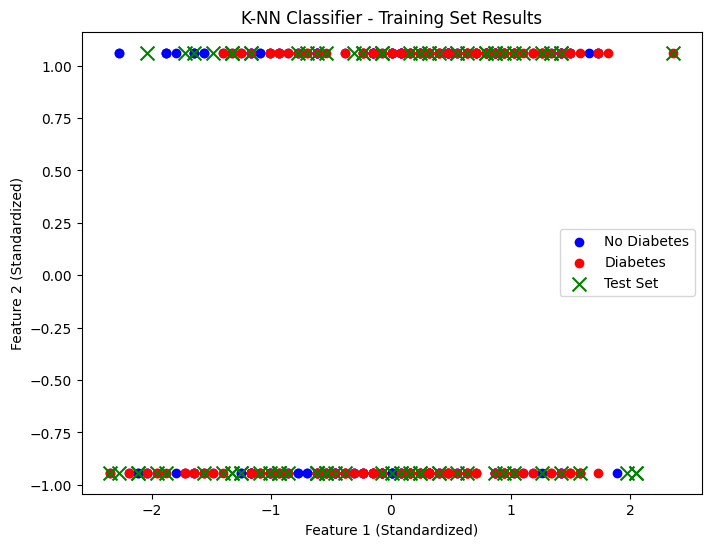

In [206]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_scaled[y_train == 0, 0], X_train_scaled[y_train == 0, 1], color='blue', label='No Diabetes')
plt.scatter(X_train_scaled[y_train == 1, 0], X_train_scaled[y_train == 1, 1], color='red', label='Diabetes')
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], color='green', label='Test Set', marker='x', s=100)
plt.title('K-NN Classifier - Training Set Results')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()
plt.show()

### Blue points represent instances without diabetes, red points represent instances with diabetes, and green 'x' markers represent the test set samples.